In [2]:
import PIL
from PIL import Image
import numpy as np

import FlatPreProcessing

from scipy.misc import imread
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

BASE_DIR = Path('.')

(train_data, label_data) = FlatPreProcessing.main()


label_data = label_data.ravel()
print("Train Shape:", train_data.shape)

rf = RandomForestClassifier(n_estimators=300)
print("Fitting Random Tree...")
rf.fit(train_data, label_data)
print("Completed fit.")

Processed: 0 of 734


Processed: 100 of 734


Processed: 200 of 734


Processed: 300 of 734


Processed: 400 of 734


Processed: 500 of 734


Processed: 600 of 734


Processed: 700 of 734


(3006464, 3)
Processed: 0 of 734


Processed: 100 of 734


Processed: 200 of 734


Processed: 300 of 734


Processed: 400 of 734


Processed: 500 of 734


Processed: 600 of 734


Processed: 700 of 734
Training Data: 

(3006464, 3)
Label Data: (3006464,)
Train Shape: (3006464, 3)
Fitting Random Tree...


Completed fit.


In [12]:
# Import the data matrix of the testing data

from LoadTestImages import main

test_data = main()

Processed: 0 of 44


(45056, 3)


In [13]:
print("Predicting Data..")
predictions = rf.predict(test_data)
print("finished Predicting!")
predictions = np.asarray(predictions).reshape(-1, 1)

Predicting Data..


In [ ]:
# K Neighbors
print("Pred Shape",predictions.shape)
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(predictions,label_data)
kpredicitions = neigh.predict(predictions)

In [10]:
# Calculate Dice Similarity Coefficient
truepos = np.sum(np.multiply(kpredictions, label_data))
falsepos = np.sum(kpredictions) - truepos
falseneg = np.sum(label_data) - truepos
precision = truepos / (truepos+falsepos)
recall = truepos / (truepos+falseneg)
dice = 2 * precision * recall / (precision + recall)

print(dice)

0.917579948817


In [11]:
pred_image = np.asarray(predictions)
print(pred_image.shape)
pred_image = pred_image.reshape(146, 32, 32)
pred_image.shape
print(np.sum(pred_image[9]==1))

(149504,)
259


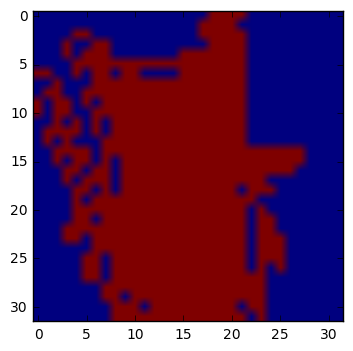

In [12]:
from scipy.misc import imread
import matplotlib.pyplot as plt
lb = np.asarray(label_data)

lb = lb.reshape(146, 32, 32)
plt.imshow(lb[5])
plt.show()

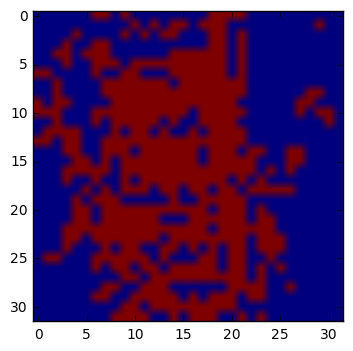

In [13]:
plt.imshow(pred_image[5])
plt.show()